In [1]:
import sys
import csv
import serial
import numpy as np
from matplotlib import pyplot as plt

In [6]:

class DataParser:
    
    # constructor
    def __init__(self, filename):
        self.filename = filename
        self.line_cnt = 0
        self.data = []
        self.content = []
        self.original_time = 8080
        
    def openfile(self):
        with open(self.filename) as f:
            reader = f.readlines()
        self.content = [x.strip() for x in reader] 
        self.line_cnt = len(self.content)
        self.original_time = int(content[1][content[1].find("...") + 3:])
        print("Successfully open the file" + str(self.filename) + " with "+ str(self.line_cnt) + " data.")
        self.read();
        
    def read(self):
        print("Start reading...")
        for i in range(self.line_cnt):
            if((i %2) == 0):
                inflow = self.content[i].find("InFlow") +  len("InFlow is:")
                outflow = self.content[i].find("OutFlow") +  len("OutFlow is:")
                f1 = self.content[i].find("F1") + len("F1 is:")
                f2 = self.content[i].find("F2") + len("F2 is:")
            else:
                row = []
                time = self.content[i].find("...") + len("...")
                row.append(float(self.content[i-1][inflow:inflow+5]))
                row.append(float(self.content[i-1][outflow:outflow+5]))
                row.append(float(self.content[i-1][f1:f1+5]))
                row.append(float(self.content[i-1][f2:f2+5]))
                row.append(int(self.content[i][time:]) - self.original_time)
                self.data.append(row)
                print("reading...%.0f%%\r" % (i*100.0//self.line_cnt))
                sys.stdout.flush()
        print("Done!")
    def save_csv(self):
        print("Save to csv")
        with open(self.filename + ".csv", "wb") as f:
            writer = csv.writer(f)
            writer.writerows(data)

Add to csv file

In [7]:
filename = "flow2"
parser = DataParser(filename)
parser.openfile()
parser.save_csv()

NameError: global name 'content' is not defined

In [184]:
parser.save_csv()

Save to csv


KeyboardInterrupt: 

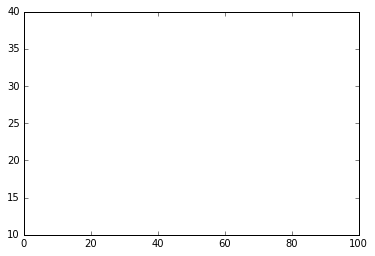

In [2]:
ser = serial.Serial('COM3', 9600)   # Your port number
 
plt.ion() # set plot to animated

ydata = [0] * 100    # deque of 100 data point
ax1=plt.axes()
# make plot
line, = plt.plot(ydata)
plt.ylim([10,40])
while True:
    data = []
    data.append(ser.readline())
    data.append(ser.readline())
    index = 0
    if data[0].find("InFlow") != -1:
        index = 1
    inflow = data[index].find("InFlow") +  len("InFlow is:")
    outflow = data[index].find("OutFlow") +  len("OutFlow is:")
    f1 = data[index].find("F1") + len("F1 is:")
    f2 = data[index].find("F2") + len("F2 is:")
    ydata.append(inflow)
    line.set_xdata(np.arange(len(ydata)))
    line.set_ydata(ydata)
    plt.draw()

In [50]:
Data

'Temperature InFlow is:25.06 = OutFlow is:25.12 = F1 is:16.62 = F2 is:-127.00 = Water Flow Rate is: 24 L/hour\n'

In [51]:
Timestemp

'Requesting temperatures and flow rate...15950\r\n'